## Question 1

In [880]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from sklearn.linear_model import Lasso
import math
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from matplotlib.pyplot import figure
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, log_loss, f1_score, zero_one_loss, mean_squared_error
warnings.filterwarnings("ignore")

In [881]:
df = pd.read_csv('ISLR-python/Notebooks/Data/Auto.csv')

In [882]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [883]:
def zero_one_function(data, median):
    """
    This function is created so that it would append 1 if a particular threshold is met 
    and appends 0 otherwise. It would return a list of 1's and 0's respectively.
    """
    new_list = []
    for values in data:
        if values > median:
            new_list.append(1)
        else:
            new_list.append(0)
    return new_list

In [884]:
mpg01 = zero_one_function(df['mpg'], median = np.median(df['mpg']))

In [885]:
df_mpg01 = pd.DataFrame(mpg01, columns = ['mpg01'])

In [886]:
df = pd.concat([df, df_mpg01], axis = 1)

In [887]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [888]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698,0.838239
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972,-0.740327
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664,-0.738607
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265,-0.745734
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084,0.322629
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314,0.454108
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000,0.511393
mpg01,0.838239,-0.740327,-0.738607,-0.745734,0.322629,0.454108,0.511393,1.000000


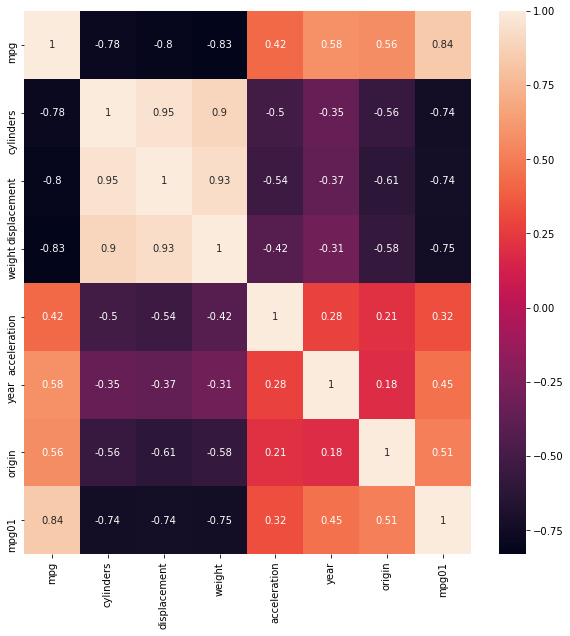

In [889]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

<font size = "5"><b>Heatmap:</b></font>

1. We can see the heatmap correlation matrix above with color coding. 
2. Higher the values of correlation between features, the lighter would be the colors used for their depiction. 
3. We see that cylinders, displacement and weight are negatively correlated with mpg01. 
4. We also see that acceleration is positively correlated with 'mpg01'.

In [890]:
def scatterplot_sns_function(x, y, hue, data, figsize = (10, 10), font_size = 15):
    """
    This function would create scatterplot using seaborn library along with default size of the figure.
    """
    plt.figure(figsize = figsize)
    sns.scatterplot(x = x, y = y, hue = hue, data = data)
    plt.title("{} Vs. {}".format(x, y), fontsize = font_size)
    plt.xlabel("{}".format(x))
    plt.ylabel("{}".format(y))
    plt.show()

In [891]:
def boxplot_sns_function(data_x, data_y, data, fig_size = (10, 10), palette = 'viridis', font_size = 15):
    """
    This function would generate boxplots from seaborn library by taking into account the figure size,
    palette and data variables that we would be using for predictions. 
    """
    plt.figure(figsize = fig_size)
    sns.boxplot(x = data_x, y = data_y, data = data, palette = palette)
    plt.title("{} Vs. {}".format(data_x, data_y), fontsize = font_size)
    plt.xlabel("{}".format(data_x))
    plt.ylabel("{}".format(data_y))
    plt.show()

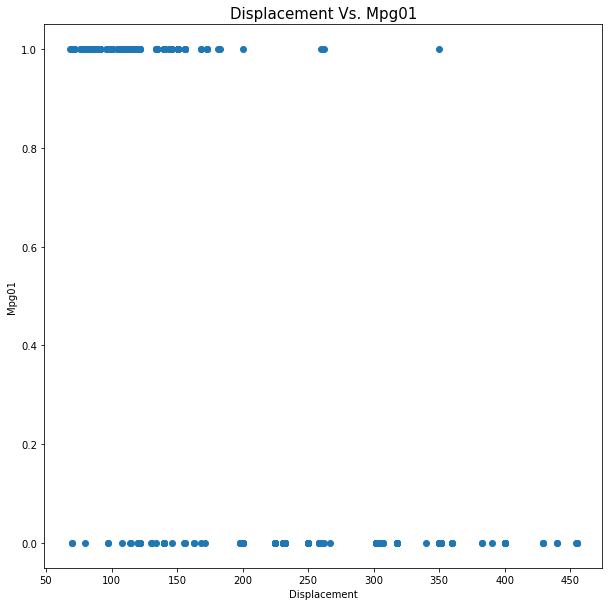

In [892]:
plt.figure(figsize = (10, 10))
plt.scatter(x = 'displacement', y = 'mpg01', data = df)
plt.title("Displacement Vs. Mpg01", fontsize = 15)
plt.xlabel("Displacement")
plt.ylabel("Mpg01")
plt.show()

## Observation: 

1. We can see that as the values of displacement increases, there is a lower possibility that the 'mpg' values to be higher than the median of 'mpg' values respectively.
2. Therefore, 'displacement' could be a useful predictor that could be given for machine learning for predictions. 

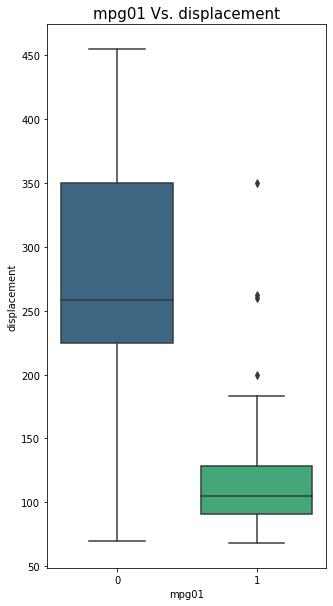

In [893]:
boxplot_sns_function(data_x = 'mpg01', data_y = 'displacement', data = df, fig_size = (5, 10))

## Obersvation: 

1. Boxplot would give us a good understanding of the spread of the quantiles and also the possible outliers.
2. From the above, we see that higher displacement values again are more related to 'mpg' values below median.
3. Similarly, we can find that lower displacement values correspond to values of 'mpg' that are higher than the median 'mpg' values respectively. 

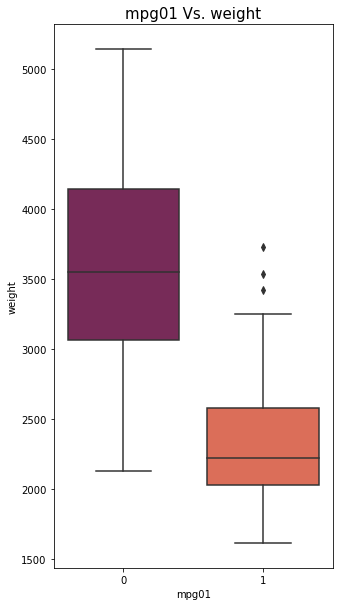

In [894]:
boxplot_sns_function(data_x = 'mpg01', data_y = 'weight', data = df, fig_size = (5, 10), palette = "rocket")

<font size = "5"><b>Observation:</b></font>

1. Here we could easily identify and distinguish the feature 'weight' based on the 'mpg01' values. Therefore, this feature is highly correlated with the 'mpg01' output variable. 
2. We've also seen the relationship using the correlation heatmap above which showed that the correlation between 'mpg01' and 'weight' is -0.75 respectively. 

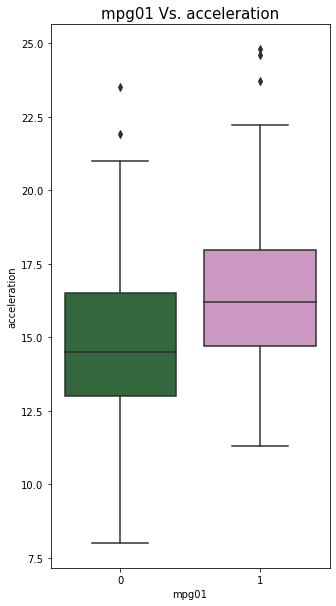

In [895]:
boxplot_sns_function(data_x = 'mpg01', data_y = 'acceleration', data = df, fig_size = (5, 10), palette = "cubehelix")

<font size = "5"><b>Observation:</b></font>

1. We could see from the observation that acceleration and mpg01 are not highly correlated as could be seen from the boxplot above.
2. In the correlation heatmap, we also see that the correlation between mpg01 and acceleration was just 0.32 respectively. 

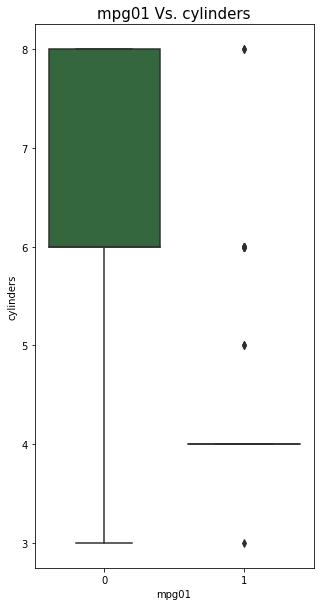

In [896]:
boxplot_sns_function(data_x = 'mpg01', data_y = 'cylinders', data = df, fig_size = (5, 10), palette = "cubehelix")

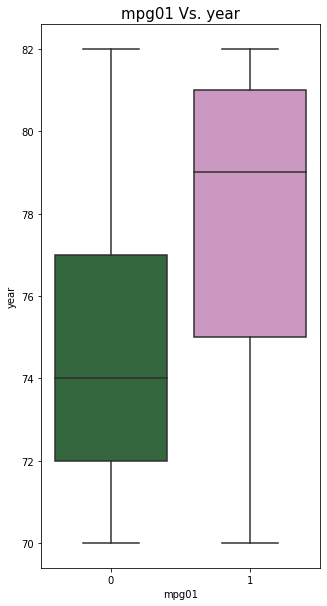

In [897]:
boxplot_sns_function(data_x = 'mpg01', data_y = 'year', data = df, fig_size = (5, 10), palette = "cubehelix")

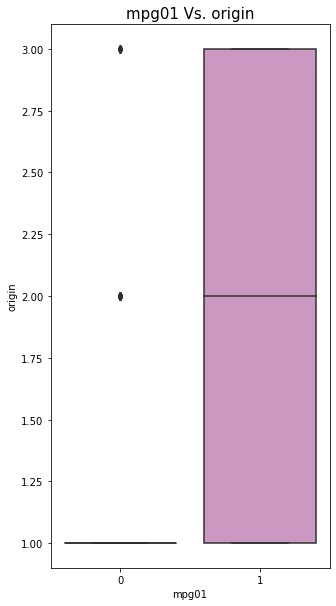

In [898]:
boxplot_sns_function(data_x = 'mpg01', data_y = 'origin', data = df, fig_size = (5, 10), palette = "cubehelix")

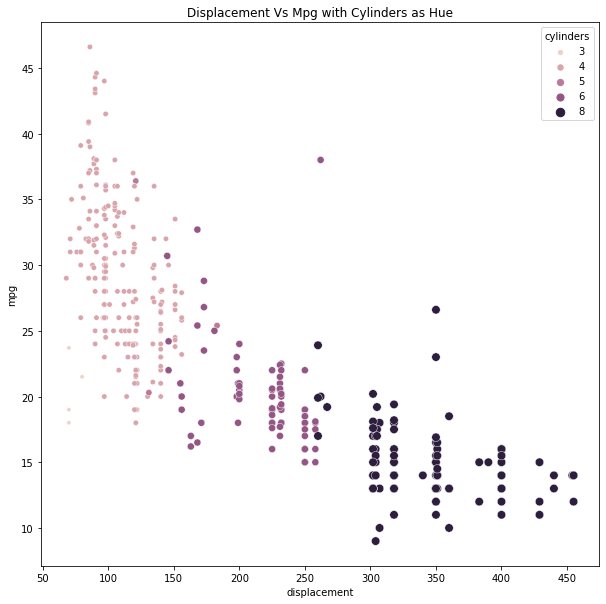

In [899]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'displacement', y = 'mpg', hue = 'cylinders', size = 'cylinders', data = df)
plt.title("Displacement Vs Mpg with Cylinders as Hue")
plt.show()

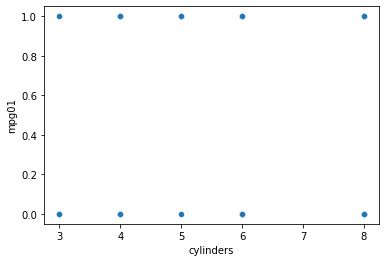

In [900]:
sns.scatterplot(y = 'mpg01', x = 'cylinders', data = df)
plt.show()

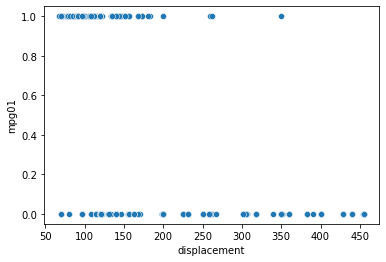

In [901]:
sns.scatterplot(y = 'mpg01', x = 'displacement', data = df)
plt.show()

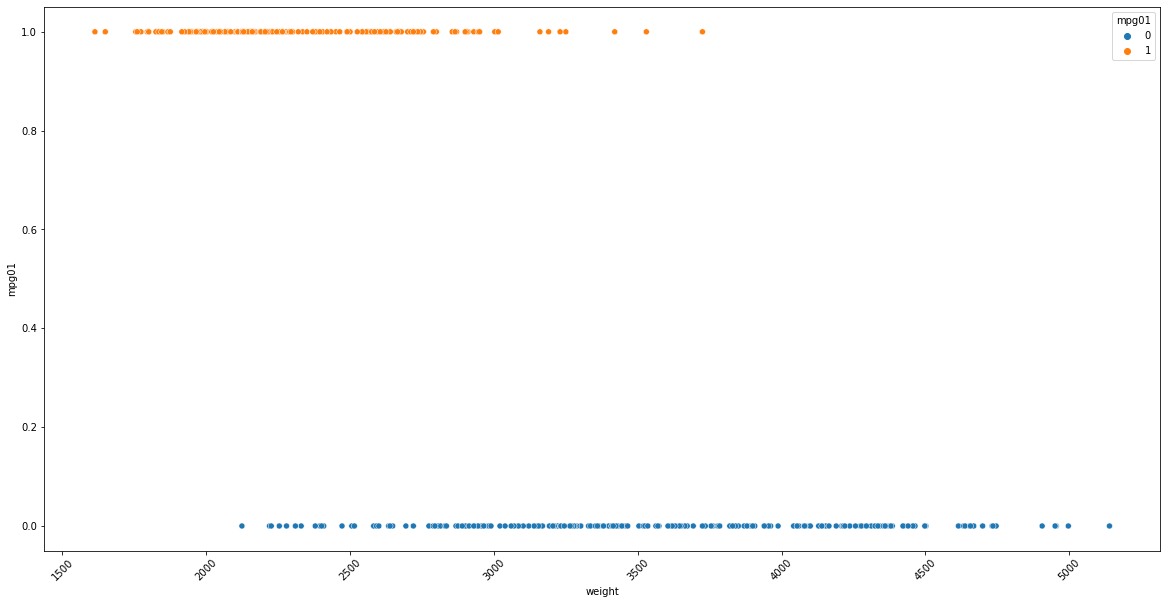

In [902]:
plt.figure(figsize = (20, 10))
sns.scatterplot(y = 'mpg01', x = 'weight', hue = 'mpg01', data = df)
plt.xticks(rotation = 45)
plt.show()

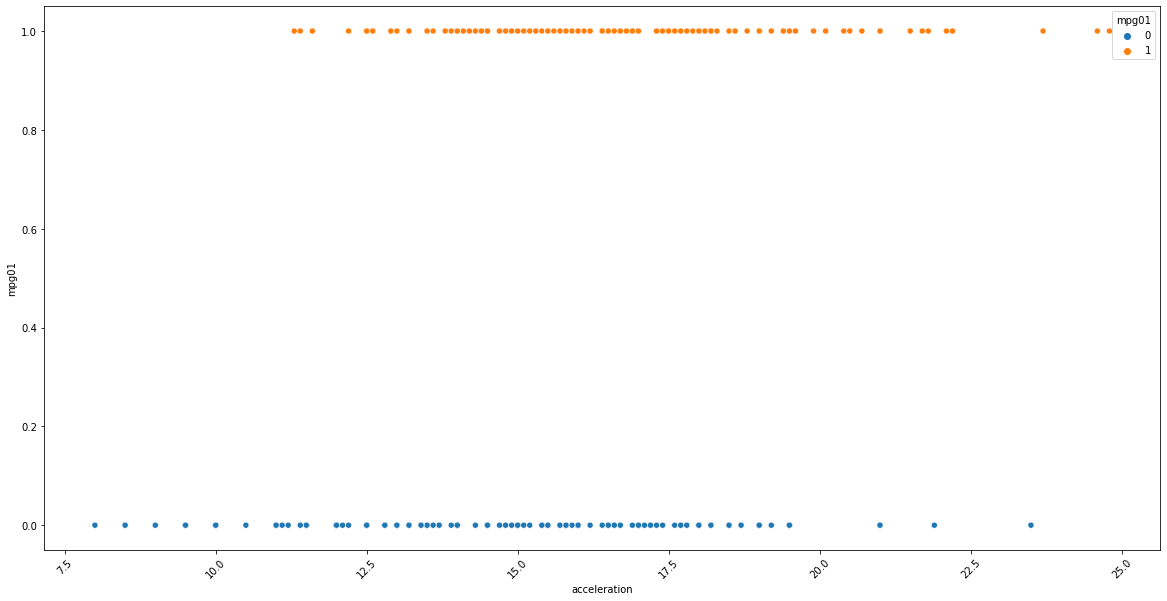

In [903]:
plt.figure(figsize = (20, 10))
sns.scatterplot(y = 'mpg01', x = 'acceleration', hue = 'mpg01', data = df)
plt.xticks(rotation = 45)
plt.show()

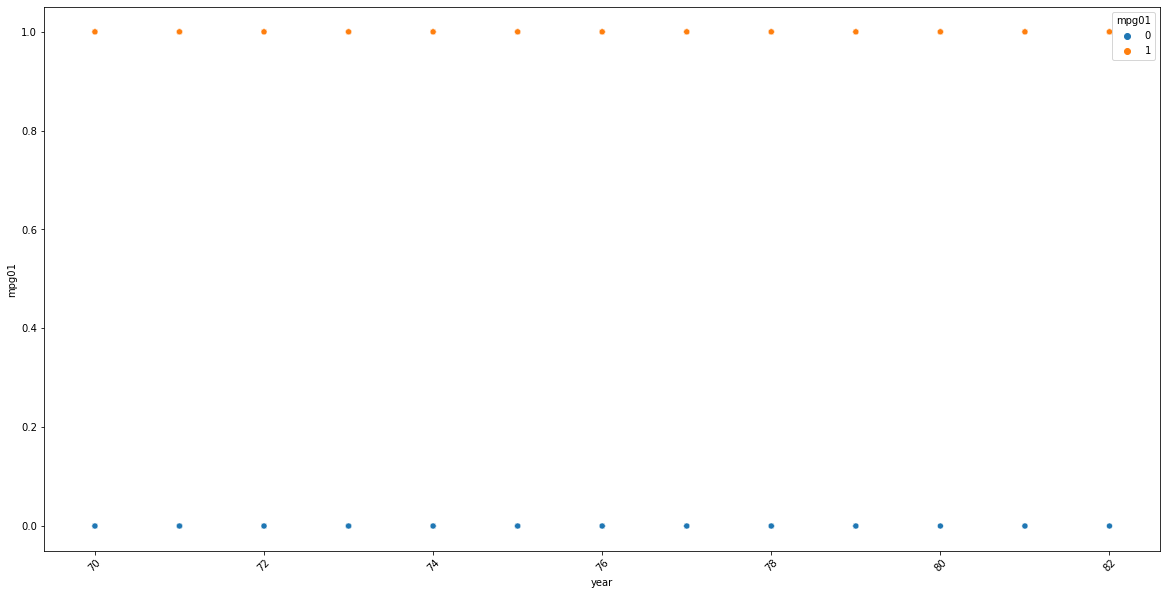

In [904]:
plt.figure(figsize = (20, 10))
sns.scatterplot(y = 'mpg01', x = 'year', hue = 'mpg01', data = df)
plt.xticks(rotation = 45)
plt.show()

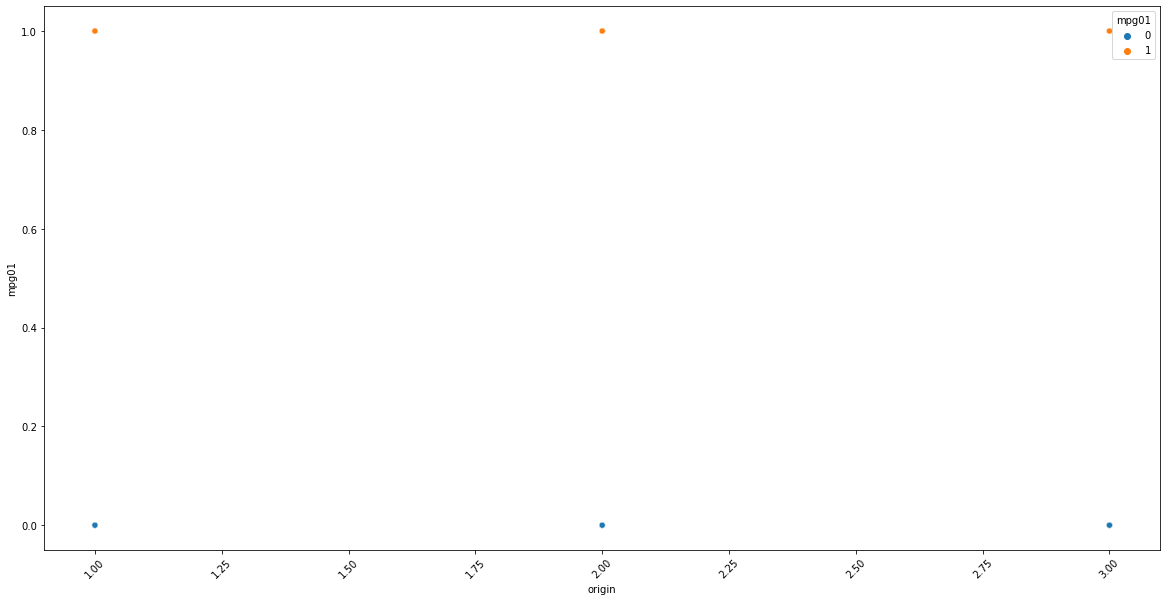

In [905]:
plt.figure(figsize = (20, 10))
sns.scatterplot(y = 'mpg01', x = 'origin', hue = 'mpg01', data = df)
plt.xticks(rotation = 45)
plt.show()

## Observation: 

1. Let us now take the 'mpg' feature rather than 'mpg01' to get a better sense of the spread of values. 
2. From the above, it could be seen that as the values of the 'displacement' feature increases, lower would the values of 'mpg' be with a few outliers in between. 

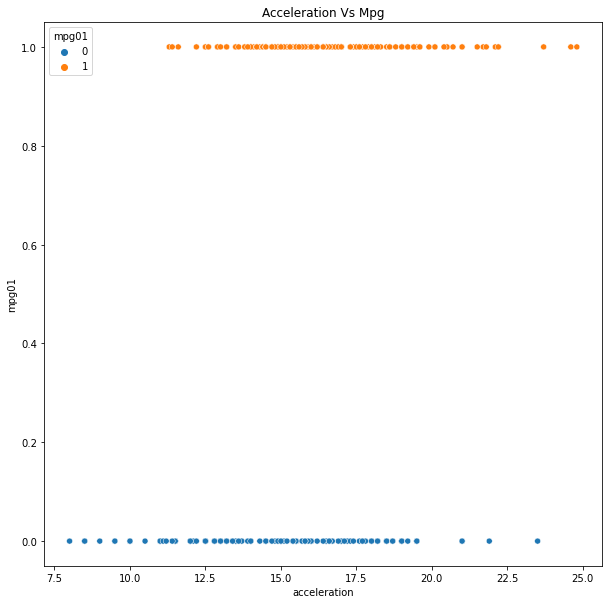

In [906]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'acceleration', y = 'mpg01', hue ='mpg01', data = df)
plt.title("Acceleration Vs Mpg")
plt.show()

## Observation: 

1. Here we are able to find a separation for 'mpg01' values and 'acceleration' but the seperation is not huge. 
2. Therefore, this feature alone might not give us a very good prediction as the 'mpg' values are not easily separable. 
3. Hence, more features must be taken into consideration for making the right predictions. 

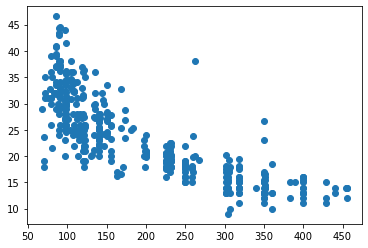

In [907]:
plt.scatter(x = 'displacement', y = 'mpg', data = df)
plt.show()

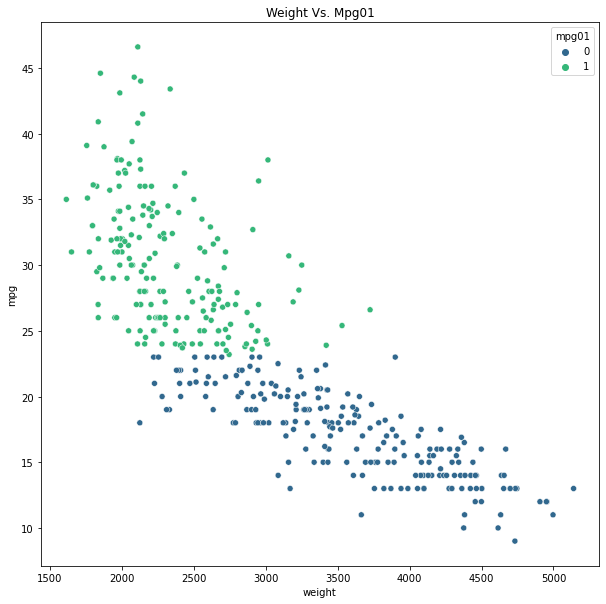

In [908]:
plt.figure(figsize = (10, 10))
sns.scatterplot(x = 'weight', y = 'mpg', hue ='mpg01', data = df, palette = 'viridis')
plt.title("Weight Vs. Mpg01")
plt.show()

## Observation:

1. From the above scatterplot, it could be seen that 'weight' and 'mpg01' are quite related to each other and they would be separated to a certain extent.
2. Therefore, weight is also a useful feature for our predictions and must be taken into consideration. 

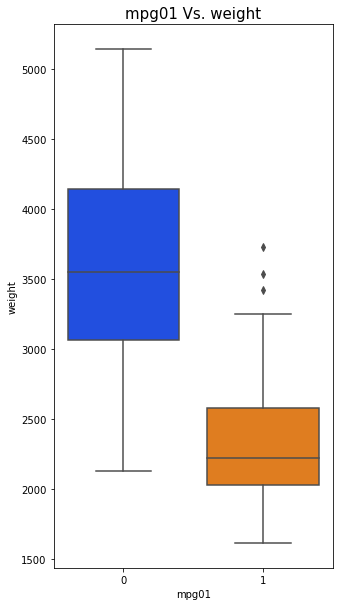

In [909]:
boxplot_sns_function(data_x = 'mpg01', data_y = 'weight', data = df, fig_size = (5, 10), palette = "bright")

## Observation:

1. When we plot a boxplot for the weight feature, it clearly shows us that the weight values could be quite separated which would ensure that we get predictions for 'mpg01' value respectively. 
2. Having a higher 'weight' would signify that 'mpg01' is lower or 0 and vice-versa. 

#### Based on this observation, we see that cylinders, displacement, weight and origin could be some of the important factors in predicting the 'mpg01' output variable respectively.

In [910]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


In [911]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
 9   mpg01         397 non-null    int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 31.1+ KB


In [912]:
## We could see that from the above, horsepower is an object
## However, it should be an integer as we are having only integer values for it
## There seems to be an additional value present that is causing the horsepower to be an object.
## Let's examine if there are any special symbols present as can be seen from the code below. 

In [913]:
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto,1
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick,0
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe,1
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra,1
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i,1


In [914]:
## We see from the above that there are some values that contain question marks. 
## It would be a good idea to remove those values and take the other values respectively. 
## However, we could also perform mean imputation or the median imputation but for now, let us remove them to 
## simplify the problem. 

In [915]:
df = df[df['horsepower'] != '?']

In [916]:
X = df.drop(['mpg01'], axis = 1)
y = df['mpg01']

In [917]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


In [918]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [919]:
print("The shape of the training input is: {}".format(X_train.shape))
print("The shape of the test input is: {}".format(X_test.shape))

The shape of the training input is: (313, 9)
The shape of the test input is: (79, 9)


In [920]:
selected_predictors = ['cylinders', 'weight', 'displacement', 'horsepower']

In [921]:
X_train_new = X_train[selected_predictors]
X_test_new = X_test[selected_predictors]

In [922]:
X_train_new.head()

,cylinders,weight,displacement,horsepower
260,6,3620,225.0,110
184,4,2572,140.0,92
174,6,2984,171.0,97
64,8,4135,318.0,150
344,4,1875,86.0,64


In [923]:
X_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313 entries, 260 to 103
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     313 non-null    int64  
 1   weight        313 non-null    int64  
 2   displacement  313 non-null    float64
 3   horsepower    313 non-null    object 
dtypes: float64(1), int64(2), object(1)
memory usage: 12.2+ KB


In [924]:
from sklearn.linear_model import LogisticRegression

In [925]:
X_train_new.shape

(313, 4)

In [926]:
y_train.shape

(313,)

In [927]:
model = LogisticRegression()
model.fit(X_train_new, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [928]:
y_test_predictions = model.predict(X_test_new)

In [929]:
y_test_predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [930]:
print("The Accuracy of Logistic Regression Model on Test Set is : {}%".format(np.round(accuracy_score(y_test_predictions, y_test) * 100, 2)))

The Accuracy of Logistic Regression Model on Test Set is : 84.81%


In [931]:
print("The log loss of Logistic Regression Model on test set is : {}".format(log_loss(y_test_predictions, y_test)))

The log loss of Logistic Regression Model on test set is : 5.2464065359032706


In [932]:
print("The F1 score of Logistic Regression Model on test set is : {}".format(f1_score(y_test_predictions, y_test)))

The F1 score of Logistic Regression Model on test set is : 0.853658536585366


In [933]:
print("The zero-one loss of Logistic Regression Model on test set is : {}".format(zero_one_loss(y_test_predictions, y_test)))

The zero-one loss of Logistic Regression Model on test set is : 0.15189873417721522


In [934]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [935]:
model = LinearDiscriminantAnalysis()
model.fit(X_train_new, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [936]:
y_test_predictions = model.predict(X_test_new)

In [937]:
y_test_predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [938]:
print("The Accuracy of Linear Discriminant Analysis Model on Test Set is : {}%".format(np.round(accuracy_score(y_test_predictions, y_test) * 100, 2)))

The Accuracy of Linear Discriminant Analysis Model on Test Set is : 88.61%


In [939]:
print("The Log loss of Linear Discriminant Analysis Model on test set is : {}".format(log_loss(y_test_predictions, y_test)))

The Log loss of Linear Discriminant Analysis Model on test set is : 3.934797310812609


In [940]:
print("The F1 score of Linear Discriminant Analysis Model on test set is : {}".format(f1_score(y_test_predictions, y_test)))

The F1 score of Linear Discriminant Analysis Model on test set is : 0.888888888888889


In [941]:
print("The zero-one loss of Linear Discriminant Analysis Model on test set is : {}".format(zero_one_loss(y_test_predictions, y_test)))

The zero-one loss of Linear Discriminant Analysis Model on test set is : 0.11392405063291144


In [942]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train_new, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [943]:
y_test_predictions = model.predict(X_test_new)

In [944]:
print("The Accuracy of Quadratic Discriminant Analysis Model on Test Set is : {}%".format(np.round(accuracy_score(y_test_predictions, y_test) * 100, 2)))

The Accuracy of Quadratic Discriminant Analysis Model on Test Set is : 88.61%


In [945]:
print("The Log loss of Quadratic Discriminant Analysis Model on test set is : {}".format(log_loss(y_test_predictions, y_test)))

The Log loss of Quadratic Discriminant Analysis Model on test set is : 3.9348074322990683


In [946]:
print("The F1 score of Quadratic Discriminant Analysis Modell on test set is : {}".format(f1_score(y_test_predictions, y_test)))

The F1 score of Quadratic Discriminant Analysis Modell on test set is : 0.8860759493670887


In [947]:
print("The zero-one loss of Quadratic Discriminant Analysis on test set is : {}".format(zero_one_loss(y_test_predictions, y_test)))

The zero-one loss of Quadratic Discriminant Analysis on test set is : 0.11392405063291144


In [948]:
K_values = [2, 5, 10, 15, 20, 25]
Log_loss_list = []
for i in K_values:
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train_new, y_train)
    y_test_predictions = model.predict(X_test_new)
    print("For K = {}".format(i))
    print("The Accuracy of K Nearest Classifier (K = {}) on test Set is : {}%".format(i, np.round(accuracy_score(y_test_predictions, y_test) * 100, 2)))
    print("The Log loss of K Nearest Classifier (K = {}) on test set is : {}".format(i, log_loss(y_test_predictions, y_test)))
    Log_loss_list.append(log_loss(y_test_predictions, y_test))
    print("The F1 score of K Nearest Classifier (K = {}) on test set is : {}".format(i, f1_score(y_test_predictions, y_test)))
    print("The zero-one loss of K Nearest Classifier (K = {}) on test set is : {}".format(i, zero_one_loss(y_test_predictions, y_test)))
    print("\n")

For K = 2
The Accuracy of K Nearest Classifier (K = 2) on test Set is : 87.34%
The Log loss of K Nearest Classifier (K = 2) on test set is : 4.372067862419218
The F1 score of K Nearest Classifier (K = 2) on test set is : 0.8529411764705882
The zero-one loss of K Nearest Classifier (K = 2) on test set is : 0.12658227848101267


For K = 5
The Accuracy of K Nearest Classifier (K = 5) on test Set is : 87.34%
The Log loss of K Nearest Classifier (K = 5) on test set is : 4.37199701201401
The F1 score of K Nearest Classifier (K = 5) on test set is : 0.878048780487805
The zero-one loss of K Nearest Classifier (K = 5) on test set is : 0.12658227848101267


For K = 10
The Accuracy of K Nearest Classifier (K = 10) on test Set is : 89.87%
The Log loss of K Nearest Classifier (K = 10) on test set is : 3.4975976096112094
The F1 score of K Nearest Classifier (K = 10) on test set is : 0.9
The zero-one loss of K Nearest Classifier (K = 10) on test set is : 0.10126582278481011


For K = 15
The Accuracy 

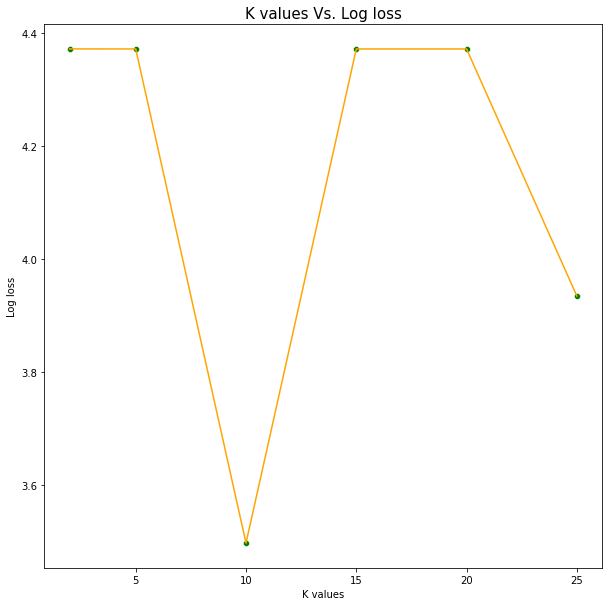

In [949]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = K_values, y = Log_loss_list, color = 'orange')
sns.scatterplot(x = K_values, y = Log_loss_list, color = 'green')
plt.title("K values Vs. Log loss", fontsize = 15)
plt.xlabel("K values")
plt.ylabel("Log loss")
plt.show()

<font size = "4">Based on the observations and if we take <b>Log loss</b> as the metric, the best value for <b>K is 10</b>.</font>

## Question 3

In [950]:
df = pd.read_csv('ISLR-python/Notebooks/Data/Boston.csv')

In [951]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [952]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [953]:
df.shape

(506, 14)

In [954]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [955]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [956]:
crim_predictor = df['crim']

In [957]:
crim_predictor.head()

0    0.00632
1    0.02731
2    0.02729
3    0.03237
4    0.06905
Name: crim, dtype: float64

In [958]:
number_of_data_points = crim_predictor.shape[0]

In [959]:
print("The number of data points considered: {}".format(number_of_data_points))

The number of data points considered: 506


In [960]:
crim_sample_mean = np.mean(crim_predictor)

In [961]:
print("The crime by town mean: {}".format(crim_sample_mean))

The crime by town mean: 3.613523557312254


In [962]:
crim_standard_error = np.std(crim_predictor) / np.sqrt(number_of_data_points)

In [964]:
print("The crime by town standard error: {}".format(crim_standard_error))

The crime by town standard error: 0.38200728338016304


Standard error measures the accuracy with which a sample distribution represents a population by using standard deviation. In other words, it represents how different is he sample mean from the population mean.

In [965]:
utils.resample(crim_predictor)

355    0.10659
264    0.55007
15     0.62739
351    0.07950
159    1.42502
        ...   
396    5.87205
294    0.08199
20     1.25179
60     0.14932
402    9.59571
Name: crim, Length: 506, dtype: float64

In [966]:
sample_mean_values = []

number_of_samples = len(crim_predictor)

for i in range(1000):
    
    resampled_data = utils.resample(crim_predictor, n_samples = number_of_samples)
    
    sample_mean_values.append(np.mean(resampled_data))  

In [967]:
bootstrap_standard_error = np.std(sample_mean_values) 

In [968]:
print("The standard error obtained for crime by town as a result of bootstrap samples is: {}".format(bootstrap_standard_error))

The standard error obtained for crime by town as a result of bootstrap samples is: 0.38432028175602134


## Observation:

1. The standard errors obtained are close to each other.

In [972]:
bootstrap_standard_error

0.38432028175602134

In [973]:
confidence_interval = [crim_sample_mean - 2 * bootstrap_standard_error, crim_sample_mean + 2 * bootstrap_standard_error]

In [974]:
print("The confidence interval lies in the range: {}".format(confidence_interval))

The confidence interval lies in the range: [2.844882993800211, 4.382164120824297]


In [975]:
import scipy

In [976]:
scipy_interval = scipy.stats.norm.interval(alpha = 0.95, loc = crim_sample_mean, scale = bootstrap_standard_error)

In [977]:
print("The population confidence interval lies in the range with 95% confidence: {}".format(scipy_interval))

The population confidence interval lies in the range with 95% confidence: (2.860269646542166, 4.366777468082342)


## Observation:

1. The confidence intervals from the library and manual calculation are quite close to each other.
2. Therefore, this could give us an idea that as sufficient number of samples are taken, we should be able to generate the population mean from the bootstrap samples. 

In [978]:
quantile_25th_crim_predictor = np.quantile(a = crim_predictor, q = 0.25)

In [979]:
print("The 25th quantile of the crime predictor is: {}".format(quantile_25th_crim_predictor))

The 25th quantile of the crime predictor is: 0.08204499999999999


In [980]:
sample_values_25th_percentile = []

number_of_samples = len(crim_predictor)

for i in range(1000):
    
    resampled_data = utils.resample(crim_predictor, n_samples = number_of_samples)
    
    sample_values_25th_percentile.append(np.quantile(a = resampled_data, q = 0.25))  

In [981]:
print("The standard error of the samples of 25th percentile is: {}".format(np.std(sample_values_25th_percentile)))

The standard error of the samples of 25th percentile is: 0.007300794362067304


## Observation:

1. Taking the 25th percentile values from 1000 bootstrap samples, we get the standard error to be about 0.00714 respectively.
2. This is significantly lower than the standard error that we've obtained as a result of taking standard error of the individual mean of the bootstrap samples. 
3. This shows us that we would be able to find 25th percentile values more accurately from samples compared to 50th percentile values and better get an estimate of 25th percentile values from the population.

In [983]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [984]:
df_reduced = df[['crim', 'rad']]

In [985]:
len(df_reduced)

506

In [986]:
beta_0_values = []
beta_1_values = []
number_of_samples = len(df_reduced)
for i in range(1000):
    resampled_data = utils.resample(df_reduced, n_samples = number_of_samples)
    X = resampled_data['rad'].to_numpy().reshape(-1, 1)
    y = resampled_data['crim'].to_numpy().reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    beta_0_values.append(model.intercept_[0])
    beta_1_values.append(model.coef_[0][0])

In [987]:
beta_0_mean = np.mean(beta_0_values)
beta_1_mean = np.mean(beta_1_values)

In [988]:
print("The mean of the beta0 values obtained from fitting bootstrap samples is: {}".format(beta_0_mean))

The mean of the beta0 values obtained from fitting bootstrap samples is: -2.288677985807876


In [989]:
print("The mean of the beta1 values obtained from fitting bootstrap samples is: {}".format(beta_1_mean))

The mean of the beta1 values obtained from fitting bootstrap samples is: 0.6180312358839929


In [990]:
beta_0_standard_error = np.std(beta_0_values)
beta_1_standard_error = np.std(beta_1_values)


In [991]:
print("The standard error of the beta0 values obtained from fitting bootstrap samples is: {}".format(beta_0_standard_error))

The standard error of the beta0 values obtained from fitting bootstrap samples is: 0.2556740185561888


In [992]:
print("The standard error of the beta1 values obtained from fitting bootstrap samples is: {}".format(beta_1_standard_error))

The standard error of the beta1 values obtained from fitting bootstrap samples is: 0.057460376512837676


In [993]:
df_reduced = df[['crim', 'rad']]

X = df_reduced['rad']
y = df_reduced['crim']

In [994]:
beta_1_linregress = scipy.stats.linregress(X, y).intercept

In [995]:
beta_0_linregress = scipy.stats.linregress(X, y).slope

In [996]:
beta_1_std_linregress = scipy.stats.linregress(X, y).intercept_stderr

In [997]:
beta_0_std_linregress = scipy.stats.linregress(X, y).stderr

In [998]:
print("The mean using linregress of the beta0 values obtained is: {}".format(beta_0_standard_error))

The mean using linregress of the beta0 values obtained is: 0.2556740185561888


In [999]:
print("The mean using linregress of the beta1 values obtained is: {}".format(beta_1_standard_error))

The mean using linregress of the beta1 values obtained is: 0.057460376512837676


In [1000]:
print("The standard error using linregress of the beta1 values obtained is: {}".format(beta_1_std_linregress))

The standard error using linregress of the beta1 values obtained is: 0.44347583375963484


In [1001]:
print("The standard error using linregress of the beta0 values obtained is: {}".format(beta_0_std_linregress))

The standard error using linregress of the beta0 values obtained is: 0.03433181966784242


## Observation:

1. The standard error values obtained as a result of Lineregress for beta0 and beta1 are quite close to the values that are obtained as a result of fitting bootstrap samples to the linear regression model. 
2. Similarly, the mean values of beta0 and beta1 of the boostrap samples are similar to the values from linregress.

## Question 4

In [1002]:
np.random.seed(123)
x = np.random.normal(0, 1, (200))
y = x + 2 * x**2 - 2 * x ** 3 + np.random.normal(0, 1, (200))

In [1003]:
X_train, X_cv, y_train, y_cv = train_test_split(x, y, random_state = 101, test_size = 0.3)

In [1004]:
X_train = np.asarray(X_train).reshape(-1, 1)
y_train = np.asarray(y_train).reshape(-1, 1)

X_cv = np.asarray(X_cv).reshape(-1, 1)
y_cv = np.asarray(y_cv).reshape(-1, 1)

In [1005]:
x = np.asarray(x).reshape(-1, 1)
y = np.asarray(y).reshape(-1, 1)

In [1006]:
def line_plot_function(data_x, data_y, fig_size = (10, 5), line_color = 'green', value = 'AIC', titlesize = 15):
    plt.figure(figsize = fig_size)
    sns.lineplot(x = data_x, y = data_y, color = line_color)
    plt.scatter(x = data_x, y = data_y)
    if value == 'AIC':
        plt.title(' Degree of predictions values Vs. AIC values', fontsize = 15)
        plt.xlabel('Number of Predictors')
        plt.ylabel('AIC values')
    else:
        plt.title('Degree of predictors values Vs. BIC values', fontsize = 15)
        plt.xlabel('Number of Predictors')
        plt.ylabel('BIC values')
    plt.show()
    

## Best Subset Selection

In [1007]:
def Ordinary_least_squares_fit(data_x, data_y):
    new_variable = sm.add_constant(data_x)
    estimate = sm.OLS(data_y, new_variable)
    new_variable_2 = estimate.fit()
    AIC_value = new_variable_2.aic
    BIC_value = new_variable_2.bic
    R_squared_adjusted = new_variable_2.rsquared_adj

    
    return new_variable_2.aic, new_variable_2.bic, R_squared_adjusted


In [1008]:
poly_model = PolynomialFeatures(degree = 10)
X_poly_features = poly_model.fit_transform(x)

In [1009]:
X_dict = {}
for i in range(1, 11):
    X_dict["degree-{}".format(i)] = list(X_poly_features[:, i])

In [1010]:
X_dataframe = pd.DataFrame.from_dict(X_dict)

In [1011]:
X_dataframe[['degree-1', 'degree-2']]

,degree-1,degree-2
0,-1.085631,1.178594
1,0.997345,0.994698
2,0.282978,0.080077
3,-1.506295,2.268924
4,-0.578600,0.334778
...,...,...
195,-3.231055,10.439716
196,-0.269293,0.072519
197,-0.110851,0.012288
198,-0.341262,0.116460


In [1012]:
X_dataframe.head()

,degree-1,degree-2,degree-3,degree-4,degree-5,degree-6,degree-7,degree-8,degree-9,degree-10
0,-1.085631,1.178594,-1.279518,1.389083,-1.508031,1.637165,-1.777356,1.929553,-2.094781,2.274159
1,0.997345,0.994698,0.992057,0.989424,0.986798,0.984178,0.981565,0.978960,0.976361,0.973769
2,0.282978,0.080077,0.022660,0.006412,0.001815,0.000513,0.000145,0.000041,0.000012,0.000003
3,-1.506295,2.268924,-3.417668,5.148015,-7.754428,11.680454,-17.594206,26.502059,-39.919911,60.131151
4,-0.578600,0.334778,-0.193703,0.112076,-0.064847,0.037521,-0.021710,0.012561,-0.007268,0.004205


In [1013]:
X_dataframe.shape

(200, 10)

In [1014]:
y.shape

(200, 1)

In [1015]:
from tqdm import tnrange
import itertools

AIC_values = []
BIC_values = []
Adjusted_R_squared_values = []
number_of_features = []
features_selected = []
for i in tnrange(1, len(X_poly_features[0]) + 1):
    for combinations in itertools.combinations(X_dataframe.columns, i):
        result = Ordinary_least_squares_fit(X_dataframe[list(combinations)], y)
        AIC_values.append(result[0])
        BIC_values.append(result[1])
        Adjusted_R_squared_values.append(result[2])
        features_selected.append(list(combinations))
        number_of_features.append(len(combinations))

In [1016]:
dataframe_evaluation = pd.DataFrame({'features_selected': features_selected, 'AIC values': AIC_values, 
                                     'BIC values': BIC_values, 'Adjusted R Squared Values': Adjusted_R_squared_values,
                                    'Number of Combinations': number_of_features})

In [1017]:
dataframe_evaluation.head()

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Combinations
0,[degree-1],1356.768181,1363.364816,0.421163,1
1,[degree-2],1387.524884,1394.121519,0.324938,1
2,[degree-3],1065.501335,1072.097970,0.865079,1
3,[degree-4],1330.869591,1337.466225,0.491468,1
4,[degree-5],1063.848982,1070.445617,0.866189,1


In [1018]:
df_min_AIC_values = dataframe_evaluation[dataframe_evaluation.groupby('Number of Combinations')['AIC values'].transform(min)
                              == dataframe_evaluation['AIC values']]

In [1019]:
df_max_AIC_values = dataframe_evaluation[dataframe_evaluation.groupby('Number of Combinations')['AIC values'].transform(max)
                              == dataframe_evaluation['AIC values']]

In [1020]:
df_min_BIC_values = dataframe_evaluation[dataframe_evaluation.groupby('Number of Combinations')['BIC values'].transform(min)
                              == dataframe_evaluation['BIC values']]

In [1021]:
df_max_BIC_values = dataframe_evaluation[dataframe_evaluation.groupby('Number of Combinations')['BIC values'].transform(max)
                              == dataframe_evaluation['BIC values']]

In [1022]:
df_min_AIC_values.head()

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Combinations
4,[degree-5],1063.848982,1070.445617,0.866189,1
19,"[degree-2, degree-3]",604.930648,614.825600,0.986578,2
55,"[degree-1, degree-2, degree-3]",542.275105,555.468374,0.990236,3
175,"[degree-1, degree-2, degree-3, degree-4]",544.212798,560.704385,0.990189,4
404,"[degree-1, degree-2, degree-3, degree-8, degre...",545.843611,565.633516,0.990157,5


In [1023]:
df_max_AIC_values.head()

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Combinations
1,[degree-2],1387.524884,1394.121519,0.324938,1
20,"[degree-2, degree-4]",1326.108160,1336.003112,0.505877,2
169,"[degree-6, degree-8, degree-10]",1311.609986,1324.803255,0.542681,3
286,"[degree-2, degree-4, degree-6, degree-8]",1306.447055,1322.938642,0.556507,4
560,"[degree-2, degree-4, degree-6, degree-8, degre...",1296.914593,1316.704497,0.579198,5


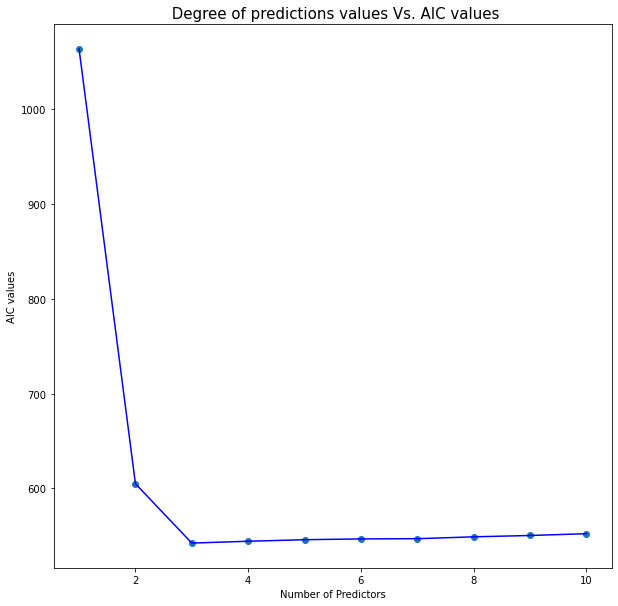

In [1024]:
line_plot_function(data_x = df_min_AIC_values['Number of Combinations'], data_y = df_min_AIC_values['AIC values'],
                  line_color = 'blue', fig_size = (10, 10))

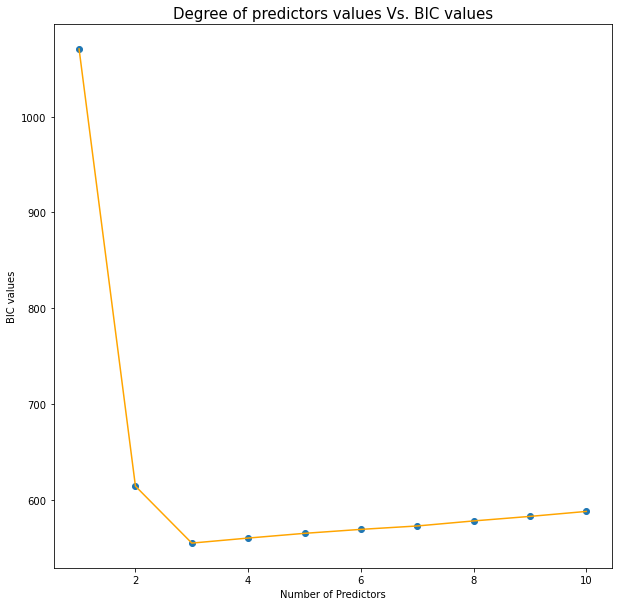

In [1025]:
line_plot_function(data_x = df_min_AIC_values['Number of Combinations'], data_y = df_min_AIC_values['BIC values'],
                  line_color = 'orange', fig_size = (10, 10), value = 'BIC')

## Observation:

1. We can see that with the increase in the number of predictors, the AIC values don't tend to increase as much as the BIC values.
2. This shows us that BIC metric would penalize higher number of predictors as compared to AIC.
3. Let us now find the best model with the lowest AIC and BIC values and get their coefficients. 

In [1026]:
df_min_AIC_values.head()

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Combinations
4,[degree-5],1063.848982,1070.445617,0.866189,1
19,"[degree-2, degree-3]",604.930648,614.825600,0.986578,2
55,"[degree-1, degree-2, degree-3]",542.275105,555.468374,0.990236,3
175,"[degree-1, degree-2, degree-3, degree-4]",544.212798,560.704385,0.990189,4
404,"[degree-1, degree-2, degree-3, degree-8, degre...",545.843611,565.633516,0.990157,5


In [1027]:
AIC_best = df_min_AIC_values[df_min_AIC_values['AIC values'] == df_min_AIC_values['AIC values'].min()]

In [1028]:
AIC_best

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Combinations
55,"[degree-1, degree-2, degree-3]",542.275105,555.468374,0.990236,3


We see that features with degree-1, degree-2 and degree-3 has the lowest AIC value. Let us confirm this with BIC values as well. 

In [1029]:
BIC_best = df_min_BIC_values[df_min_BIC_values['BIC values'] == df_min_BIC_values['BIC values'].min()]

In [1030]:
BIC_best

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Combinations
55,"[degree-1, degree-2, degree-3]",542.275105,555.468374,0.990236,3


Similarly, we find that degree-1, degree-2 and degree-3 polynomials perform the best with lowest BIC values as well.

In [1031]:
X_dataframe.head()

,degree-1,degree-2,degree-3,degree-4,degree-5,degree-6,degree-7,degree-8,degree-9,degree-10
0,-1.085631,1.178594,-1.279518,1.389083,-1.508031,1.637165,-1.777356,1.929553,-2.094781,2.274159
1,0.997345,0.994698,0.992057,0.989424,0.986798,0.984178,0.981565,0.978960,0.976361,0.973769
2,0.282978,0.080077,0.022660,0.006412,0.001815,0.000513,0.000145,0.000041,0.000012,0.000003
3,-1.506295,2.268924,-3.417668,5.148015,-7.754428,11.680454,-17.594206,26.502059,-39.919911,60.131151
4,-0.578600,0.334778,-0.193703,0.112076,-0.064847,0.037521,-0.021710,0.012561,-0.007268,0.004205


In [1032]:
AIC_best['features_selected'][:].tolist()[0]

['degree-1', 'degree-2', 'degree-3']

In [1033]:
X_best = X_dataframe[AIC_best['features_selected'][:].tolist()[0]]

In [1034]:
X_best.head()

,degree-1,degree-2,degree-3
0,-1.085631,1.178594,-1.279518
1,0.997345,0.994698,0.992057
2,0.282978,0.080077,0.022660
3,-1.506295,2.268924,-3.417668
4,-0.578600,0.334778,-0.193703


In [1035]:
model = LinearRegression()
model.fit(X_best, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1036]:
print("The best model coefficients are: {}".format(model.coef_[0]))

The best model coefficients are: [ 0.91457218  2.06305955 -1.97085806]


## Forward Feature Selection

In [1037]:
AIC_values = []
BIC_values = []
best_AIC_values, best_BIC_values, best_Adjusted_R_squared_values = [], [], []
best_combinations = []
Adjusted_R_squared_values = []
number_of_features = []
features = []
features_list = dict()
features_remaining = list(X_dataframe.columns.values)


for i in range(1, len(X_dataframe.columns) + 1):
    best_AIC_value = np.inf
    for combinations in itertools.combinations(features_remaining, 1):
        result = Ordinary_least_squares_fit(X_dataframe[list(combinations) + features], y)
        
        if result[0] < best_AIC_value:
            
            best_AIC_value = result[0]
            best_BIC_value = result[1]
            best_R_squared_value = result[2]
            best_AIC_values.append(best_AIC_value)
            best_BIC_values.append(best_BIC_value)
            best_Adjusted_R_squared_values.append(best_R_squared_value)
            best_combinations.append(list(combinations) + features)
            number_of_features.append(len(list(combinations) + features))
            best_feature = combinations[0]
            
    features.append(best_feature) 
    features_remaining.remove(best_feature)
    AIC_values.append(best_AIC_value)
    BIC_values.append(best_BIC_value)
    Adjusted_R_squared_values.append(best_R_squared_value)
    features_list[i] = features.copy()


In [1038]:
dataframe_evaluation = pd.DataFrame({'features_selected': best_combinations, 'AIC values': best_AIC_values, 
                                     'BIC values': best_BIC_values, 'Adjusted R Squared Values': best_Adjusted_R_squared_values,
                                    'Number of Features': number_of_features})

In [1039]:
dataframe_evaluation.head(8)

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Features
0,[degree-1],1356.768181,1363.364816,0.421163,1
1,[degree-3],1065.501335,1072.097970,0.865079,1
2,[degree-5],1063.848982,1070.445617,0.866189,1
3,"[degree-1, degree-5]",1029.184072,1039.079024,0.888038,2
4,"[degree-2, degree-5]",962.814068,972.709020,0.919656,2
5,"[degree-1, degree-5, degree-2]",819.762062,832.955331,0.960899,3
6,"[degree-3, degree-5, degree-2]",575.614422,588.807691,0.988465,3
7,"[degree-1, degree-5, degree-2, degree-3]",544.257773,560.749360,0.990187,4


In [1040]:
df_min_AIC_values = dataframe_evaluation[dataframe_evaluation.groupby('Number of Features')['AIC values'].transform(min)
                              == dataframe_evaluation['AIC values']]

In [1041]:
df_max_AIC_values = dataframe_evaluation[dataframe_evaluation.groupby('Number of Features')['AIC values'].transform(max)
                              == dataframe_evaluation['AIC values']]

In [1042]:
df_min_BIC_values = dataframe_evaluation[dataframe_evaluation.groupby('Number of Features')['BIC values'].transform(min)
                              == dataframe_evaluation['BIC values']]

In [1043]:
df_max_BIC_values = dataframe_evaluation[dataframe_evaluation.groupby('Number of Features')['BIC values'].transform(max)
                              == dataframe_evaluation['BIC values']]

In [1044]:
df_min_AIC_values.head()

,features_selected,AIC values,BIC values,Adjusted R Squared Values,Number of Features
2,[degree-5],1063.848982,1070.445617,0.866189,1
4,"[degree-2, degree-5]",962.814068,972.709020,0.919656,2
6,"[degree-3, degree-5, degree-2]",575.614422,588.807691,0.988465,3
7,"[degree-1, degree-5, degree-2, degree-3]",544.257773,560.749360,0.990187,4
10,"[degree-9, degree-5, degree-2, degree-3, degre...",546.122824,565.912728,0.990143,5


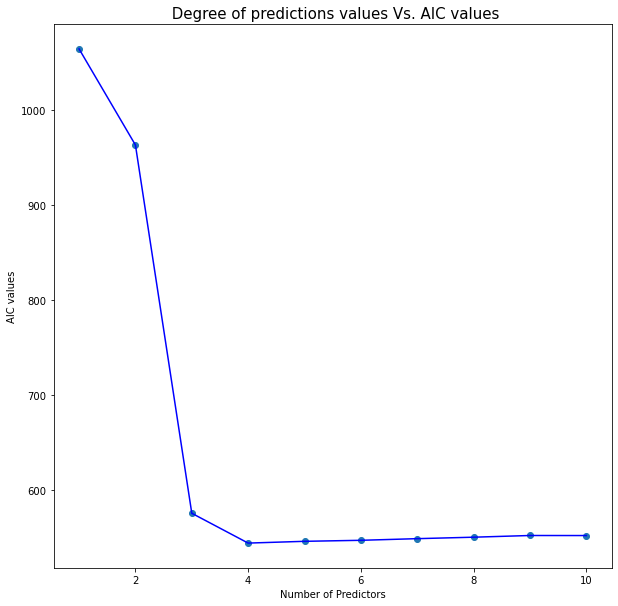

In [1045]:
line_plot_function(data_x = df_min_AIC_values['Number of Features'], data_y = df_min_AIC_values['AIC values'],
                  line_color = 'blue', fig_size = (10, 10))

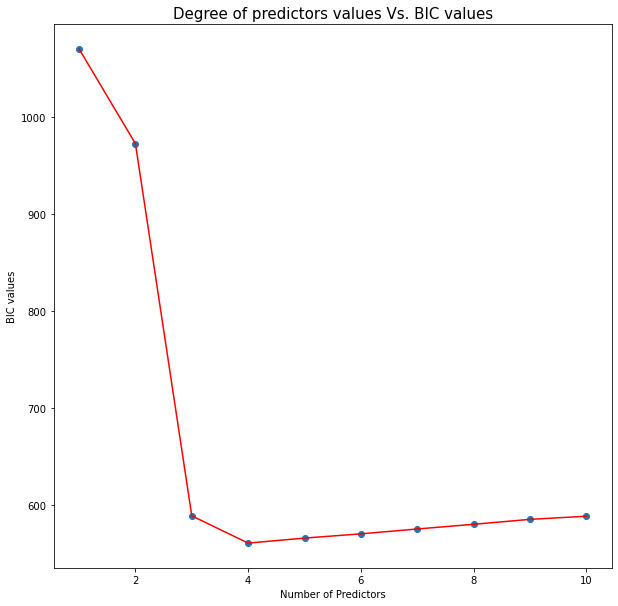

In [1046]:
line_plot_function(data_x = df_min_AIC_values['Number of Features'], data_y = df_min_AIC_values['BIC values'],
                  line_color = 'red', fig_size = (10, 10), value = 'BIC')

## Observation: 

1. In the above graphs where we performed forward feature selection, we see that the best AIC values (minimum AIC value) are for 4 predictors.
2. The values are quite similar for both AIC and BIC values as well. 

We would now be taking the best features from our forward feature selection model and get an understanding of the model below. 

In [1047]:
AIC_best = df_min_AIC_values[df_min_AIC_values['AIC values'] == df_min_AIC_values['AIC values'].min()]

In [1048]:
X_best = X_dataframe[AIC_best['features_selected'][:].tolist()[0]]

In [1049]:
X_best.head()

,degree-1,degree-5,degree-2,degree-3
0,-1.085631,-1.508031,1.178594,-1.279518
1,0.997345,0.986798,0.994698,0.992057
2,0.282978,0.001815,0.080077,0.022660
3,-1.506295,-7.754428,2.268924,-3.417668
4,-0.578600,-0.064847,0.334778,-0.193703


In [1050]:
model = LinearRegression()
model.fit(X_best, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1051]:
print("The best model coefficients are: {}".format(model.coef_[0]))

The best model coefficients are: [ 9.00525882e-01 -1.09796498e-03  2.06083460e+00 -1.96089198e+00]


1. We see that when performing subset selection, we are left with degree-1, degree-2 and degree-3 as features.
2. On the other hand, for the forward feature selection, we are left with degree-1, degree-2, degree-3 and degree-5 as the input features.
3. All these values are taken based on the AIC values and BIC values respectively.

## Lasso Regression

In [1052]:
lambda_values = [0.005, 0.01, 0.02, 0.09, 0.16, 0.20, 0.25]

X_poly = PolynomialFeatures(degree = 10)
X_poly_train = X_poly.fit_transform(X_train)
X_poly_cv = X_poly.transform(X_cv)
    
mean_squared_error_values = []    
for i in lambda_values:
    model = Lasso(alpha = i) 
    model.fit(X_poly_train, y_train)
    y_predictions = model.predict(X_poly_cv)
    mean_squared_error_values.append(mean_squared_error(y_predictions, y_cv))

In [1053]:
mean_squared_error_values

[0.9656663835259699,
 0.9507852790116574,
 0.9372445539538333,
 0.9329323543156935,
 0.9313040948151533,
 0.948008735397271,
 0.9840672353357919]

In [1054]:
def line_plot_function_lasso(data_x, data_y, fig_size = (10, 10), line_color = 'orange',
                            font_size = 15):
    plt.figure(figsize = (10, 10))
    sns.lineplot(x = data_x, y = data_y, color = line_color)
    plt.title('Mean Squared Error values Vs Lambda Values', fontsize = font_size)
    plt.xlabel('Lambda Values')
    plt.ylabel('Mean Square Error (MSE)')
    plt.scatter(x = data_x, y = data_y)
    plt.show()

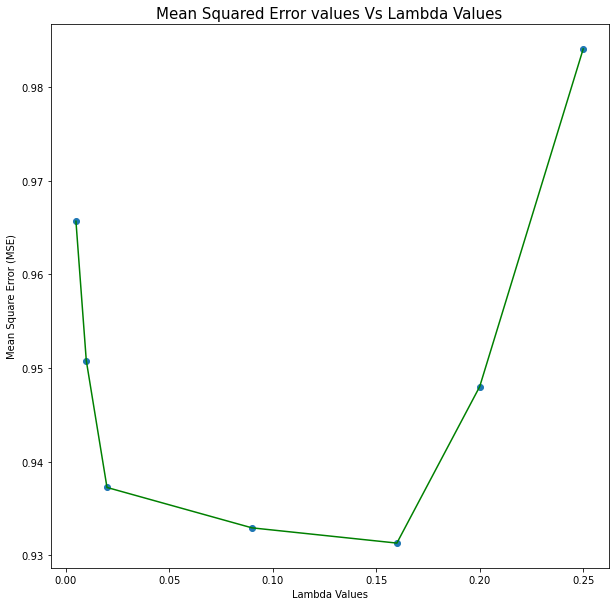

In [1055]:
line_plot_function_lasso(data_x = lambda_values, data_y = mean_squared_error_values, line_color = 'green')

<font size = "4">The best value of Lambda based on the set of values that we've taken is <b>lambda = 0.16</b></font>

In [1056]:
best_lambda_value = 0.16

In [1057]:
model = Lasso(alpha = best_lambda_value) 
model.fit(X_poly_train, y_train)
y_predictions = model.predict(X_poly_cv)
print("The Mean Squared Error for the Lasso regression with best (lambda = {}) is: {}".format(best_lambda_value, mean_squared_error(y_predictions, y_cv)))

The Mean Squared Error for the Lasso regression with best (lambda = 0.16) is: 0.9313040948151533


In [1058]:
model.coef_

array([ 0.00000000e+00, -0.00000000e+00,  1.20746315e+00, -9.68022593e-01,
        3.48969524e-01, -2.26668191e-01, -4.82003058e-02,  7.82009619e-03,
        2.73845905e-05,  9.58396660e-04,  3.34492856e-04])

<font size = "4"><b>Observation:</b></font>

1. Since the lasso regression would reduce the coefficients to zero if they are not that important in predictions, we see from the above that few coefficients are zero respectively. 
2. In the case of Ridge regression, the coefficients may not have been zero as compared to Lasso where few coefficients are zero respectively.

## Question 5

In [1059]:
df = pd.read_csv('ISLR-python/Notebooks/Data/College.csv')

In [1060]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [1061]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [1062]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

In [1063]:
df['Accept.Rate'] = df['Accept'] / df['Apps']

In [1064]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Accept.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,0.742169
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,0.880146
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,0.768207
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,0.836930
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,0.756477


In [1065]:
df = pd.get_dummies(df, columns = ['Private'])

In [1066]:
X = df.drop(['Accept.Rate', 'Apps', 'Accept', 'Unnamed: 0', 'Private_No'], axis = 1)
y = df['Accept.Rate']

In [1067]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 101, test_size = 0.2)

In [1068]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1069]:
y_predictions = model.predict(X_test)

In [1070]:
MSE = mean_squared_error(y_test, y_predictions)
RMSE = math.sqrt(MSE)

In [1071]:
print("The mean squared error (MSE) of Linear Regression in our dataset for the test set is: {}".format(MSE))
print("The root mean squared error (RMSE) of Linear Regression in our dataset for the test set is: {}".format(RMSE))
print("The R square value of Linear Regression in our dataset for the test data is {}".format(r2_score(y_test, y_predictions)))

The mean squared error (MSE) of Linear Regression in our dataset for the test set is: 0.013753484143004787
The root mean squared error (RMSE) of Linear Regression in our dataset for the test set is: 0.11727524949026878
The R square value of Linear Regression in our dataset for the test data is 0.4372232476185307


In [1072]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, random_state = 101, test_size = 0.2)

In [1073]:
X_train.shape

(496, 16)

In [1074]:
X_cv.shape

(125, 16)

In [1075]:
X_test.shape

(156, 16)

In [1076]:
lambda_values = [0.001, 0.01, 0.02, 0.09, 0.16, 0.20, 0.25]
MSE_list = []
for i in lambda_values:
    model = Ridge(alpha = i)
    model.fit(X_train, y_train)
    y_predictions = model.predict(X_cv)
    MSE = mean_squared_error(y_cv, y_predictions)
    MSE_list.append(MSE)
    RMSE = math.sqrt(MSE)
    print("For Lambda = {}".format(i))
    print("The mean squared error (MSE) of Ridge Regression (Lambda = {}) in our dataset for the cross validation data is: {}".format(i, MSE))
    print("The root mean squared error (RMSE) of Ridge Regression (Lambda = {}) in our dataset for the cross validation data is: {}".format(i, RMSE))
    print("The R square value of Ridge Regression (Lambda = {}) in our dataset for the cross validation data is {}".format(i, r2_score(y_cv, y_predictions)))
    print("\n")

For Lambda = 0.001
The mean squared error (MSE) of Ridge Regression (Lambda = 0.001) in our dataset for the cross validation data is: 0.014592414991252727
The root mean squared error (RMSE) of Ridge Regression (Lambda = 0.001) in our dataset for the cross validation data is: 0.12079906866881353
The R square value of Ridge Regression (Lambda = 0.001) in our dataset for the cross validation data is 0.1846893724647738


For Lambda = 0.01
The mean squared error (MSE) of Ridge Regression (Lambda = 0.01) in our dataset for the cross validation data is: 0.01459244583261212
The root mean squared error (RMSE) of Ridge Regression (Lambda = 0.01) in our dataset for the cross validation data is: 0.12079919632436352
The R square value of Ridge Regression (Lambda = 0.01) in our dataset for the cross validation data is 0.1846876492895423


For Lambda = 0.02
The mean squared error (MSE) of Ridge Regression (Lambda = 0.02) in our dataset for the cross validation data is: 0.01459248012409503
The root me

In [1077]:
def plot_function(x, y, figsize = (5, 5), font_size = 10, color = 'green', parameter = 'Lambda'):
    figure(figsize = (10, 5), dpi = 100)
    plt.plot(x, y, color = color)
    if parameter == 'Lambda':
        plt.xlabel('Lambda values', fontsize = font_size)
        plt.ylabel('Mean Squared Error (MSE)', fontsize = font_size)
        plt.title('Mean Squared Error Vs Lambda Values')
        plt.show()
    elif parameter == 'Number of Components':
        plt.xlabel('Number of Components', fontsize = font_size)
        plt.ylabel('Mean Squared Error (MSE)', fontsize = font_size)
        plt.title('Mean Squared Error Vs Number of Components')
        plt.show()

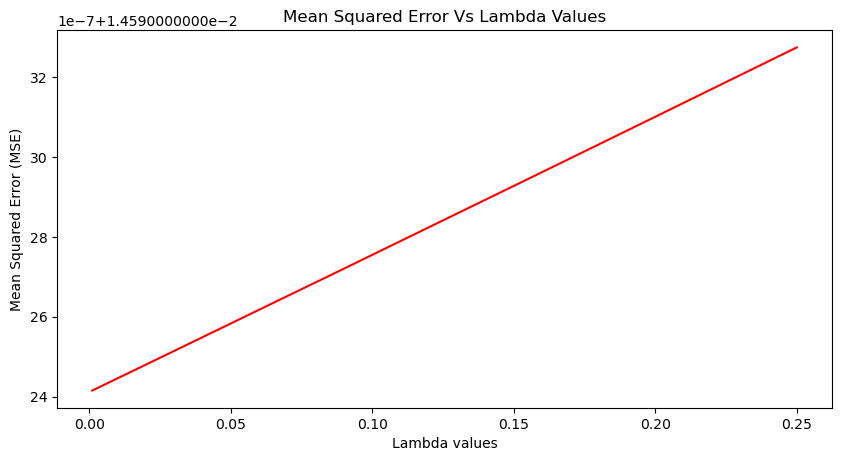

In [1078]:
plot_function(lambda_values, MSE_list, color = 'red')

<font size = "4">Therefore, the best value of <b>lambda</b> based on the results above is <b>0.001</b></font>

In [1079]:
best_lambda = 0.001

In [1080]:
model = Ridge(alpha = best_lambda)
model.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1081]:
y_predictions = model.predict(X_test)

In [1082]:
MSE = mean_squared_error(y_test, y_predictions)
RMSE = math.sqrt(MSE)

In [1083]:
print("The mean squared error (MSE) of Ridge Regression in our dataset for the test set is: {}".format(MSE))
print("The root mean squared error (RMSE) of Ridge Regression in our dataset for the test set is: {}".format(RMSE))
print("The R square value of Ridge Regression in our dataset for the test data is {}".format(r2_score(y_test, y_predictions)))

The mean squared error (MSE) of Ridge Regression in our dataset for the test set is: 0.013492379676134916
The root mean squared error (RMSE) of Ridge Regression in our dataset for the test set is: 0.11615670310462034
The R square value of Ridge Regression in our dataset for the test data is 0.4479073420901166


In [1084]:
lambda_values = [0.01, 0.02, 0.09, 0.16, 0.20, 0.25]
MSE_list = []
for i in lambda_values:
    model = Lasso(alpha = i)
    model.fit(X_train, y_train)
    y_predictions = model.predict(X_cv)
    MSE = mean_squared_error(y_cv, y_predictions)
    MSE_list.append(MSE)
    RMSE = math.sqrt(MSE)
    print("For Lambda = {}".format(i))
    print("The mean squared error (MSE) of Lasso Regression (Lambda = {}) in our dataset for the cross validation is: {}".format(i, MSE))
    print("The root mean squared error (RMSE) of Lasso Regression (Lambda = {}) in our dataset for the cross validation is: {}".format(i, RMSE))
    print("The R square value of Lasso Regression (Lambda = {}) in our dataset for the cross validation is {}".format(i, r2_score(y_cv, y_predictions)))
    print("\n")

For Lambda = 0.01
The mean squared error (MSE) of Lasso Regression (Lambda = 0.01) in our dataset for the cross validation is: 0.01508012493561733
The root mean squared error (RMSE) of Lasso Regression (Lambda = 0.01) in our dataset for the cross validation is: 0.12280116015582805
The R square value of Lasso Regression (Lambda = 0.01) in our dataset for the cross validation is 0.15743993492935338


For Lambda = 0.02
The mean squared error (MSE) of Lasso Regression (Lambda = 0.02) in our dataset for the cross validation is: 0.015170139203271454
The root mean squared error (RMSE) of Lasso Regression (Lambda = 0.02) in our dataset for the cross validation is: 0.12316711900207561
The R square value of Lasso Regression (Lambda = 0.02) in our dataset for the cross validation is 0.15241063792181897


For Lambda = 0.09
The mean squared error (MSE) of Lasso Regression (Lambda = 0.09) in our dataset for the cross validation is: 0.01595328766268493
The root mean squared error (RMSE) of Lasso Regr

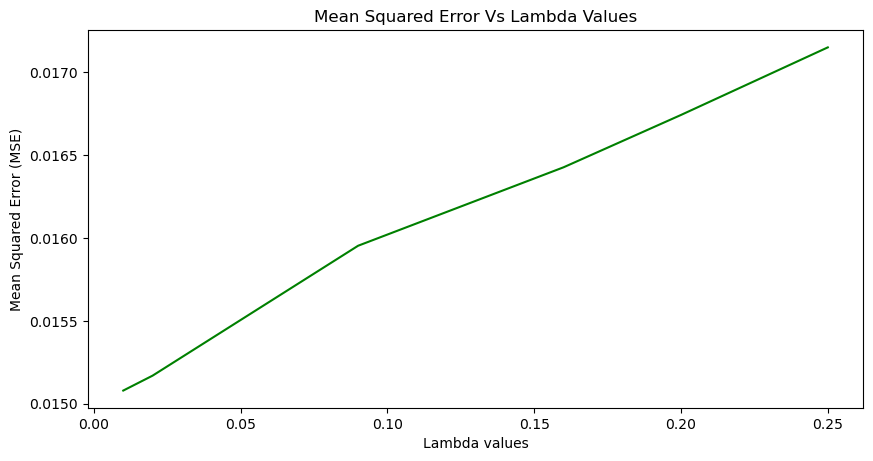

In [1085]:
plot_function(lambda_values, MSE_list, color = 'green')

<font size = "4">Therefore, the best value of <b>lambda</b> based on the results above is <b>0.005</b></font>

In [1086]:
best_lambda = 0.01

In [1087]:
model = Lasso(alpha = best_lambda)
model.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [1088]:
y_predictions = model.predict(X_test)

In [1089]:
MSE = mean_squared_error(y_test, y_predictions)
RMSE = math.sqrt(MSE)

In [1090]:
print("The mean squared error (MSE) of Lasso Regression in our dataset for the test set is: {}".format(MSE))
print("The root mean squared error (RMSE) of Lasso Regression in our dataset for the test set is: {}".format(RMSE))
print("The R square value of Lasso Regression in our dataset for the test data is {}".format(r2_score(y_test, y_predictions)))

The mean squared error (MSE) of Lasso Regression in our dataset for the test set is: 0.01422136401732807
The root mean squared error (RMSE) of Lasso Regression in our dataset for the test set is: 0.11925336061230338
The R square value of Lasso Regression in our dataset for the test data is 0.4180781412993999


In [1091]:
model.coef_

array([ 2.14801754e-05, -2.54815605e-03, -1.69595196e-04, -2.19025596e-06,
       -1.15733100e-05,  5.24853681e-06, -1.92628262e-05, -8.15490686e-05,
        2.35645593e-07, -3.56221737e-04, -0.00000000e+00, -4.42229147e-03,
        8.05169960e-04, -7.53983648e-06, -1.08656856e-03,  0.00000000e+00])

From the above, there are 2 zero coefficients.

The number of non-zero coefficients in <b>lasso regression is 14 </b>respectively.

In [1092]:
number_of_components = [1, 2, 3, 5, 10, 15, 16]
MSE_list = []
for i in number_of_components:
    PCA_model = PCA(n_components = i)
    PCA_model.fit(X_train)
    reduced_features_train = PCA_model.transform(X_train)
    reduced_features_cv = PCA_model.transform(X_cv)
    model = LinearRegression()
    model.fit(reduced_features_train, y_train)
    y_predictions = model.predict(reduced_features_cv)
    MSE = mean_squared_error(y_cv, y_predictions)
    MSE_list.append(MSE)
    RMSE = math.sqrt(MSE)
    print("For Principle Components = {}".format(i))
    print("The mean squared error (MSE) of Linear Regression in our dataset for the cross validation data is: {}".format(MSE))
    print("The root mean squared error (RMSE) of Linear Regression in our dataset for the cross validation data is: {}".format(RMSE))
    print("The R square value of Lasso Regression Linear Regression in our dataset for the cross vallidation data is {}".format(r2_score(y_cv, y_predictions)))
    print("\n")

For Principle Components = 1
The mean squared error (MSE) of Linear Regression in our dataset for the cross validation data is: 0.020254583562528468
The root mean squared error (RMSE) of Linear Regression in our dataset for the cross validation data is: 0.14231859879344114
The R square value of Lasso Regression Linear Regression in our dataset for the cross vallidation data is -0.13166855827008583


For Principle Components = 2
The mean squared error (MSE) of Linear Regression in our dataset for the cross validation data is: 0.020158054196910812
The root mean squared error (RMSE) of Linear Regression in our dataset for the cross validation data is: 0.14197906253004636
The R square value of Lasso Regression Linear Regression in our dataset for the cross vallidation data is -0.1262752482727698


For Principle Components = 3
The mean squared error (MSE) of Linear Regression in our dataset for the cross validation data is: 0.020057959071029148
The root mean squared error (RMSE) of Linear R

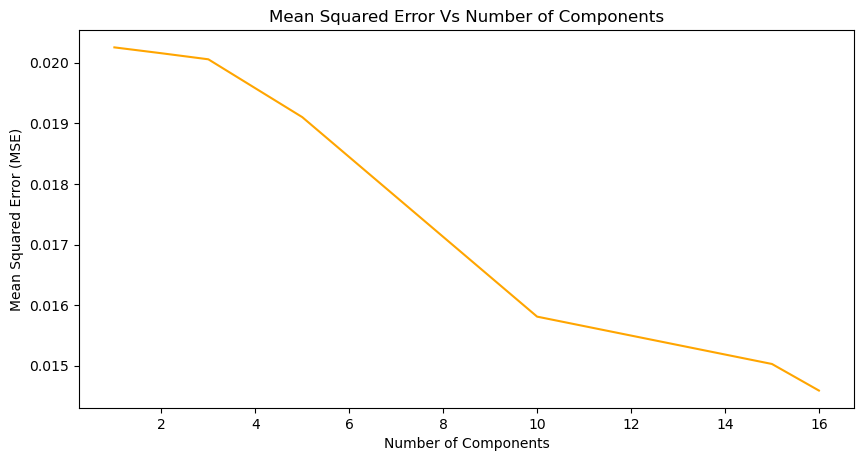

In [1093]:
plot_function(number_of_components, MSE_list, color = 'orange', parameter = 'Number of Components')

<font size = "4">Therefore, the best value of the <b>Number of Components is 10</b> as this is significantly reducing the <b>Mean Squared error</b> and capturing most of the information.</font>

In [1094]:
best_number_of_components = 10

In [1102]:
PCA_model = PCA(n_components = best_number_of_components)
PCA_model.fit(X_train)
reduced_features_train = PCA_model.transform(X_train)
reduced_features_test = PCA_model.transform(X_test)
model = LinearRegression()
model.fit(reduced_features_train, y_train)
y_predictions = model.predict(reduced_features_test)
MSE = mean_squared_error(y_test, y_predictions)
MSE_list.append(MSE)
RMSE = math.sqrt(MSE)
print("For Principle Components = {}".format(best_number_of_components))
print("The mean squared error (MSE) of Linear Regression in our dataset for the test set is: {}".format(MSE))
print("The root mean squared error (RMSE) of Linear Regression in our dataset for the test set is: {}".format(RMSE))
print("The R square value of Linear Regression in our dataset for the test data is: {}".format(r2_score(y_test, y_predictions)))

For Principle Components = 3
The mean squared error (MSE) of Linear Regression in our dataset for the test set is: 0.017247278275164816
The root mean squared error (RMSE) of Linear Regression in our dataset for the test set is: 0.1313288935275281
The R square value of Linear Regression in our dataset for the test data is: 0.29426121016371576


In [1103]:
number_of_components = [1, 2, 3, 5, 10, 15, 16]
MSE_list = []
for i in number_of_components:
    model = PLSRegression(n_components = i)
    model.fit(X_train, y_train)
    y_predictions = model.predict(X_cv)
    MSE = mean_squared_error(y_cv, y_predictions)
    MSE_list.append(MSE)
    RMSE = math.sqrt(MSE)
    print("For Number of Components = {}".format(i))
    print("The mean squared error (MSE) of PLS Regression in our dataset for the cross validation data is: {}".format(MSE))
    print("The root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: {}".format(RMSE))
    print("The R square value of PLS Regression in our dataset for the cross validation is: {}".format(r2_score(y_cv, y_predictions)))
    print("\n")

For Number of Components = 1
The mean squared error (MSE) of PLS Regression in our dataset for the cross validation data is: 0.0180391795007697
The root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: 0.13431001266015016
The R square value of PLS Regression in our dataset for the cross validation is: -0.00788901410831655


For Number of Components = 2
The mean squared error (MSE) of PLS Regression in our dataset for the cross validation data is: 0.01684404179317435
The root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: 0.12978459767312278
The R square value of PLS Regression in our dataset for the cross validation is: 0.05888598337871187


For Number of Components = 3
The mean squared error (MSE) of PLS Regression in our dataset for the cross validation data is: 0.014800750219482064
The root mean squared error (RMSE) of PLS Regression in our dataset for the cross validation data is: 0.1216583339

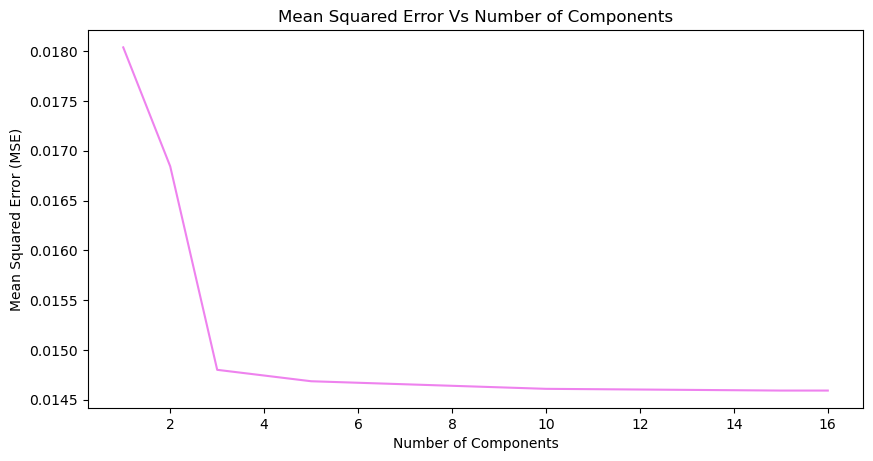

In [1104]:
plot_function(number_of_components, MSE_list, color = 'violet', parameter = 'Number of Components')

<font size = "4">Therefore, the best value of the <b>Number of Components is 3</b> as this is significantly reducing the <b>Mean Squared error</b> and capturing most of the information.</font>

In [1098]:
best_number_of_components = 3

In [1100]:
model = PLSRegression(n_components = best_number_of_components)
model.fit(X_train, y_train)
y_predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, y_predictions)
MSE_list.append(MSE)
RMSE = math.sqrt(MSE)
print("For Number of Components = {}".format(best_number_of_components))
print("The mean squared error (MSE) of PLS Regression in our dataset for the test set is: {}".format(MSE))
print("The root mean squared error (RMSE) of PLS Regression in our dataset for the test set is: {}".format(RMSE))
print("The R square value of PLS Regression in our dataset for the test data is: {}".format(r2_score(y_test, y_predictions)))

For Number of Components = 3
The mean squared error (MSE) of PLS Regression in our dataset for the test set is: 0.014214239787954894
The root mean squared error (RMSE) of PLS Regression in our dataset for the test set is: 0.11922348672956555
The R square value of PLS Regression in our dataset for the test data is: 0.4183696565713243
